What I am going to research is to discover the differences in between two airline companies. I will look between the Etihad Airways and American Airlines and to use the different programs and packages to find out what problems each airline has based off their individual reviews. I will be either web crawling or extracting data from twitter to gather the data and then clean it. I will be using sentiment analysis for analyzing and comparing the reviews for each airline. I have flown with American Airlines many times and I am curious to find out what other people think or what their opinions are of these two airline companies. I would like to use topic modeling and network analytics and word cloud to figure out what topics are usually stated in reviews or comments and to discover who has the most connections and who provides the most comments of these airlines. I love to fly and this topic will be interesting for me because I love to travel and discover the new amenities and accessories that are provided between each airline and how they operate during the flight.

In [1]:
# import python packages
import requests
from lxml import html
import csv
import pandas as pd
 

In [2]:
r = requests.get('https://www.tripadvisor.com/Airline_Review-d8729020-Reviews-American-Airlines')
data = html.fromstring(r.text)

# Xpath
title = data.xpath("//div/a/span[@class='noQuotes']/text()") 
print title

['Avoid at all costs', 'LIVE in DFW area and SICK of American Airlines', 'flight from texas to lax', 'Comfortable Seats and Great Staff', 'no issues with flight', 'Yet another poor experience with AA flight attendants', 'Smart Bag', 'mediocre', 'AA - what a pleasure', 'Need more time on lay overs when returing back to the states from overseas.']


In [3]:
review = data.xpath("//div[@class='entry']/p/text()")
print review

[u"\nThis is my second flight from hell experience over three trips with this airline in two years, meaning they've been tolerable one and abysmal the other \u2154 of the time. This time, on the way out, I paid for better seats for me and my husband on my AA card, which I got because it was supposed to get my...\n", "\nI have literally had it with American Airlines!! First let me say we usually fly AA because it is conveniently located 15 minutes from our home and that's about all the choices we have at DFW as AA rules there!! My husband travels a LOT for business and again we did an international trip over to China. The older ladies...\n", '\nthey will not let you jump on early.. why... it would save and possible give others chance to get on you flight..\nwe left 2 hr late..... they delayed 3 x... i could have gone earlier but no...\nso this flight full and no one could get on early...\nno help just no...\nneed more customer service they do not...\n', '\nThe flight was on time. The bo

In [4]:
a = "https://www.tripadvisor.com/Airline_Review-d8729020-Reviews-or"
b = "-American-Airlines#REVIEWS"
count = 1
for i in range(1,5):
    print a + b

https://www.tripadvisor.com/Airline_Review-d8729020-Reviews-or-American-Airlines#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729020-Reviews-or-American-Airlines#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729020-Reviews-or-American-Airlines#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729020-Reviews-or-American-Airlines#REVIEWS


In [5]:
a = "https://www.tripadvisor.com/Airline_Review-d8729020-Reviews-or"
b = "-American-Airlines#REVIEWS"
count = 1
for i in range(1,5):
    print '%s%s%s' %(a,count,b)
    count = count + 50  

https://www.tripadvisor.com/Airline_Review-d8729020-Reviews-or1-American-Airlines#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729020-Reviews-or51-American-Airlines#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729020-Reviews-or101-American-Airlines#REVIEWS
https://www.tripadvisor.com/Airline_Review-d8729020-Reviews-or151-American-Airlines#REVIEWS


In [6]:
Testdata = []
a = "https://www.tripadvisor.com/Airline_Review-d8729020-Reviews-or"
b = "-American-Airlines#REVIEWS"
count = 1

for i in range(1,10):
    url = '%s%s%s' %(a,count,b)
    count = count + 50   
    data = html.fromstring(requests.get(url).text)
    
    # Xpath
    title = data.xpath("//div/a/span[@class='noQuotes']/text()")  
    review = data.xpath("//div[@class='entry']/p/text()")
    crawleddata = zip(title, review)
    for row in crawleddata:
        Testdata.append(row)

In [7]:
finaldata = pd.DataFrame(Testdata)
finaldata.to_csv("data/americanairlines.csv", encoding= 'utf-8')

Now I have collected data from about 5 pages and I will save it under the csv file americanairlines.csv.

In [8]:
finaldata = []

a = "https://www.tripadvisor.com/Airline_Review-d8729020-Reviews-or"
b = "-American-Airlines#REVIEWS"
count = 1

for i in range(1,10):
    url = '%s%s%s' %(a,count,b)
    count = count + 50   
    data = html.fromstring(requests.get(url).text)
    
    # Xpath
    title = data.xpath("//div/a/span[@class='noQuotes']/text()")  
    review = data.xpath("//div[@class='entry']/p/text()")     

    crawleddata = zip(title, review)
    
    for row in crawleddata:
        finaldata.append(row)    

finaldata = pd.DataFrame(finaldata)       
finaldata.to_csv("data/americanairlines.csv", encoding="utf-8")

In [9]:
import nltk
from nltk import FreqDist, word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
% matplotlib inline

# convert to string
tokens = str(review)

#lowecases
tokens = tokens.lower()

#tokenization
tokens = word_tokenize(tokens)

#Remove stopwords
tokens = (word for word in tokens if word not in stopwords.words('english'))

# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())

#remove short words
tokens = [ word for word in tokens if len(word) >= 2 ]

#Create your bigrams ... bigrams are two tokens
#bgs = nltk.bigrams(tokens)

#compute frequency distribution for all the bigrams in the text
fdist_h = nltk.FreqDist(tokens)
fdist_h.most_common(40)

[('flight', 13),
 ('hours', 5),
 ('time', 4),
 ('boarding', 3),
 ('get', 3),
 ('airline', 3),
 ('airlines', 3),
 ('due', 3),
 ('hour', 3),
 ('american', 3),
 ('plane', 3),
 ('seats', 2),
 ('like', 2),
 ('seat', 2),
 ('issue', 2),
 ('august', 2),
 ('leg', 2),
 ('aircraft', 2),
 ('passengers', 2),
 ('luggage', 2),
 ('changed', 2),
 ('days', 2),
 ('airport', 2),
 ('usually', 2),
 ('first', 2),
 ('flying', 2),
 ('connection', 2),
 ('weather', 2),
 ('select', 2),
 ('airbus', 2),
 ('attendants', 2),
 ('mostly', 2),
 ('hold', 2),
 ('room', 2),
 ('us', 2),
 ('problem', 2),
 ('minutes', 2),
 ('charlotte', 2),
 ('take', 2),
 ('check', 2)]

In [10]:
import re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [11]:
# what if you have additional stopwords to be removed
tokens = str(review)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#additional stopwrods
more_stopwords = set(('cant', 'aint', 'today'))
extra_stoplist = set(stopwords.words('english')) | more_stopwords
tokens = (word for word in tokens if word not in extra_stoplist)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)

fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'able': 1,
          'accommodate': 1,
          'affect': 1,
          'airbus': 2,
          'aircraft': 2,
          'airline': 6,
          'airport': 2,
          'although': 1,
          'american': 3,
          'announced': 1,
          'another': 1,
          'anything': 1,
          'april': 1,
          'arriving': 1,
          u'attendant': 2,
          'august': 2,
          'bag': 1,
          'boarding': 3,
          'boeing': 1,
          'broken': 1,
          'cabin': 1,
          'call': 1,
          'carry': 1,
          'carrying': 1,
          'causing': 1,
          'change': 1,
          'changed': 2,
          'charlotte': 2,
          'check': 2,
          'checking': 1,
          'clean': 1,
          'connecting': 1,
          'connection': 2,
          'correct': 1,
          'couple': 1,
          'crew': 1,
          u'day': 2,
          'dealing': 1,
          'delay': 2,
          'delayed': 1,
          'destination': 1,
          'disembarkin

I have cleaned the data and will distribute the words in order from the most used to the least.

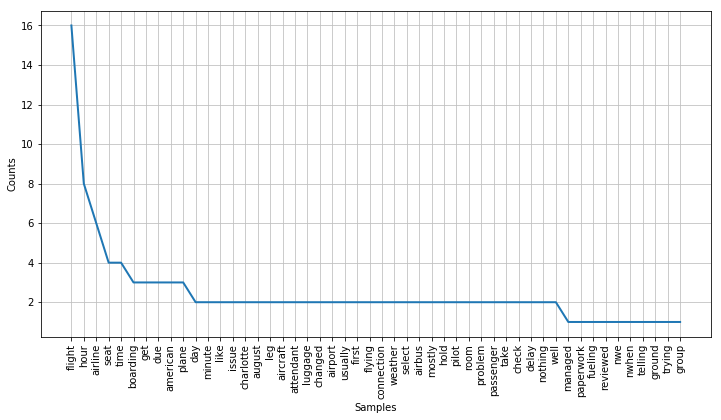

In [12]:
plt.figure(figsize=(12,6))
fdist.plot(50)

In [13]:
freq_word = []

# two values or columns in fdist_a
for k,v in fdist.items():
    freq_word.append([k,v])

#make it like an Excel worksheet
wordlist = pd.DataFrame(freq_word)

wordlist

,0,1
0,managed,1
1,paperwork,1
2,fueling,1
3,reviewed,1
4,nwe,1
5,nwhen,1
6,telling,1
7,ground,1
8,trying,1
9,group,1


In [14]:
wordlist = wordlist.rename(columns={0: 'word', 1: 'freq'})
wordlist

,word,freq
0,managed,1
1,paperwork,1
2,fueling,1
3,reviewed,1
4,nwe,1
5,nwhen,1
6,telling,1
7,ground,1
8,trying,1
9,group,1


(-0.5, 399.5, 199.5, -0.5)

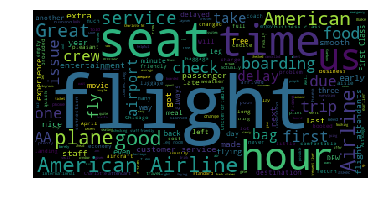

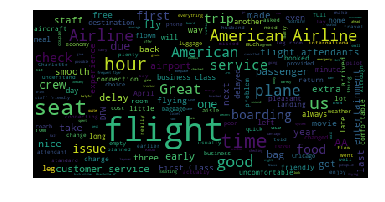

In [15]:
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

text = open(path.join('data/americanairlines.csv')).read()

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis("off")

wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")

This wordcloud helps figure out what topics are being talked about what words are used more frequently.
As you can see American Airlines is a big one and flight, service, seating, and customer service.

In [28]:
openfile = open("data/americanairlines1.csv", "rb")
r = csv.reader(openfile)
reviews = []
for i in r:
    reviews.append(i)
openfile.close()
print reviews [:1]

[['LIVE in DFW area and SICK of American Airlines', "\r\nI have literally had it with American Airlines!! First let me say we usually fly AA because it is conveniently located 15 minutes from our home and that's about all the choices we have at DFW as AA rules there!! My husband travels a LOT for business and again we did an international trip over to China. The older ladies...\r\n"]]


In [29]:
#remove the extra bracket
reviews = [x for y in reviews for x in y]
# Remove useless numbers and alphanumerical words
documents = [re.sub("[^a-zA-Z]+", " ", document) for document in reviews]
# tokenize
texts = [[word for word in document.lower().split() ] for document in documents]

#Bing-Liu lexicon (positive word list & negative word list)
positive_words = open("data/positive-words.txt", "rb").read().splitlines()
negative_words = open("data/negative-words.txt", "rb").read().splitlines()

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    print positive, negative, positive-negative, "Positive" if positive-negative > 0 else "Neutral" if positive-negative == 0 else "Negative"

0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
0 1 -1 Negative
2 0 2 Positive
5 0 5 Positive
0 1 -1 Negative
2 1 1 Positive
0 1 -1 Negative
2 3 -1 Negative
1 0 1 Positive
1 3 -2 Negative
0 1 -1 Negative
3 2 1 Positive
1 0 1 Positive
2 0 2 Positive
0 0 0 Neutral
0 1 -1 Negative
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
0 1 -1 Negative
0 0 0 Neutral
2 1 1 Positive
0 0 0 Neutral
1 2 -1 Negative
0 1 -1 Negative
1 0 1 Positive
0 0 0 Neutral
2 3 -1 Negative
1 0 1 Positive
4 1 3 Positive
1 0 1 Positive
2 0 2 Positive
1 0 1 Positive
3 0 3 Positive
0 1 -1 Negative
1 2 -1 Negative
1 0 1 Positive
5 0 5 Positive
1 0 1 Positive
3 3 0 Neutral
0 0 0 Neutral
1 0 1 Positive
1 0 1 Positive
6 0 6 Positive
0 1 -1 Negative
0 2 -2 Negative
1 0 1 Positive
3 2 1 Positive
0 0 0 Neutral
2 3 -1 Negative
0 0 0 Neutral
0 0 0 Neutral
1 1 0 Neutral
1 1 0 Neutral
2 0 2 Positive
2 3 -1 Negative
0 0 0 Neutral
2 2 0 Neutral
1 0 1 Positive
0 1 -1 Negative
1 0 1 Positive
6 0 6 Positive
0 0 0 Neutral
1 2 -1 Negative
0 0 0 

In [30]:
positive_review = []
negative_review = []
neutral_review = []

for sentence in texts:
    positive = 0
    negative = 0
    for word in sentence:
        if word in positive_words:
            positive += 1
        elif word in negative_words:
            negative += 1
    if positive-negative > 0:
        positive_review.append(sentence)
    elif positive-negative == 0:
        neutral_review.append(sentence)
    else:
        negative_review.append(sentence)

In [31]:
print len(positive_review), "positive"
print len(negative_review), "negative"
print len(neutral_review), "neutral"

77 positive
52 negative
51 neutral


Now I am distributing the different sentences and seeing which ones come out more positive and which ones come out more negative. As you can see there were more positive reviews than negative for the American Airlines but there were a significant amount of negatives as well.

In [1]:
import pandas as pd
import csv

from gensim.corpora import Dictionary
from gensim.models import ldamodel
import numpy
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning) 

C:\Users\holli\Anaconda\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
texts = []
r = csv.reader(open('data/americanairlines.csv', 'rb'))
for i in r:
    texts.append(i)  
len(texts)

90

In [3]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [4]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

numpy.random.seed(1) # setting random seed to get the same results each time. Remove this line for HW
for k in range(2,10):
    goodLdaModel = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=50)
    goodcm = CoherenceModel(model=goodLdaModel, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    print goodcm.get_coherence()

-22.339880527719473
-22.279008918651872
-22.126829895982873
-22.05987112600851
-22.03552248238147
-22.087698147296557
-22.050740384648368
-22.049049506618715


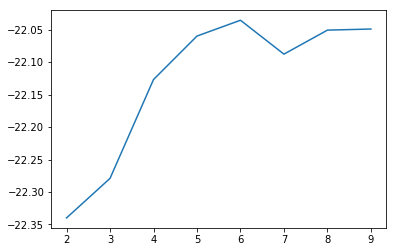

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

numpy.random.seed(1) # setting random seed to get the same results each time.
k_range = range(2,10)
scores = []
for k in k_range:
    goodLdaModel = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=50)
    goodcm = CoherenceModel(model=goodLdaModel, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(goodcm.get_coherence())
    
plt.figure()
plt.plot(k_range, scores)

In [6]:
numpy.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=2, passes=20)

In [7]:
model.show_topics()

[(0,
  u'0.009*"\r\nAll I can say is, if you enjoy being treated like cattle fly American Airlines. I was poisoned on the way to San Diego by their mini pretzels. I had two bags of these beauties, only because they were the only free thing on the menu, and it proceeded to close down my bladder! Like any poison it took time...\r\n" + 0.009*"\r\nI have been traveling for many years on multiple airlines and AA flight attendants consistently have the worst attitudes and very poor customer service skills. They routinely treat passengers like an annoyance rather than a customer that keeps them employed. I just got back from a trip to St Croix, definitely a US territory, went to the rear of the...\r\n" + 0.009*"Flight from Hell" + 0.009*"\r\nWhy do the passengers with the seats in the rear of the plane load last? It is a struggle to get done the aisles with the carry on baggage in hand and people struggling to get into their seats ahead of you. Comfort is a luxury not provided anymore.\r\n" +

In [8]:
for i in range(0,2):
    topics = model.show_topic(i, 10)
    print ', '.join([str(word[0]) for word in topics])


All I can say is, if you enjoy being treated like cattle fly American Airlines. I was poisoned on the way to San Diego by their mini pretzels. I had two bags of these beauties, only because they were the only free thing on the menu, and it proceeded to close down my bladder! Like any poison it took time...
, 
I have been traveling for many years on multiple airlines and AA flight attendants consistently have the worst attitudes and very poor customer service skills. They routinely treat passengers like an annoyance rather than a customer that keeps them employed. I just got back from a trip to St Croix, definitely a US territory, went to the rear of the...
, Flight from Hell, 
Why do the passengers with the seats in the rear of the plane load last? It is a struggle to get done the aisles with the carry on baggage in hand and people struggling to get into their seats ahead of you. Comfort is a luxury not provided anymore.
, 
A pleasant airline. Reasonable leg room for the length of fli

Up above is the topics that are being talked about and this is where the main descriptions are of the airlines by the customers and what they experienced and what their opinions are about the airlines.

In [9]:
lda_corpus = model[corpus]

results = []
for i in lda_corpus:
    print i
    results.append(i)
print 

[(0, 0.17539881), (1, 0.8246012)]
[(0, 0.17538315), (1, 0.82461685)]
[(0, 0.82692206), (1, 0.17307799)]
[(0, 0.17539346), (1, 0.8246066)]
[(0, 0.82693005), (1, 0.17306994)]
[(0, 0.17540674), (1, 0.82459325)]
[(0, 0.8268989), (1, 0.17310111)]
[(0, 0.826915), (1, 0.17308497)]
[(0, 0.17538519), (1, 0.8246148)]
[(0, 0.17541079), (1, 0.82458925)]
[(0, 0.82690454), (1, 0.17309548)]
[(0, 0.8269151), (1, 0.17308487)]
[(0, 0.8269246), (1, 0.17307533)]
[(0, 0.175413), (1, 0.82458705)]
[(0, 0.17537846), (1, 0.8246215)]
[(0, 0.17539603), (1, 0.824604)]
[(0, 0.8269237), (1, 0.17307624)]
[(0, 0.8269253), (1, 0.17307472)]
[(0, 0.8269225), (1, 0.17307751)]
[(0, 0.82690567), (1, 0.17309439)]
[(0, 0.8269207), (1, 0.17307937)]
[(0, 0.17536895), (1, 0.82463104)]
[(0, 0.1753906), (1, 0.82460946)]
[(0, 0.17544258), (1, 0.82455736)]
[(0, 0.82692856), (1, 0.17307146)]
[(0, 0.17541), (1, 0.82458997)]
[(0, 0.1753813), (1, 0.82461864)]
[(0, 0.17539461), (1, 0.8246054)]
[(0, 0.82692546), (1, 0.17307454)]
[(0, 0.8

Gephi Network Analytics

According to Gephi, there were many different tweets, tweeted by many different users. The most prominent one was American Airlines with a Degree of 119 and Etihad Airways with a Degree of 16. The Betweenness Centrality was not even close. American Airlines is the top one with 28431 and followed by Etihad with about 6000. these two users or organizations were the most prominent and most influential in the Twitter realm. They had the most posts discussing promotions and deals and also retweeting what good things were said about their company. 

StoryTelling

What I have found is that the two airlines are pretty neck and neck with each other. They seem to have similar faults and similar pros with the good seating and great service and not a lot of layover time. Based on the data I would suggest that Etihad Airways seems to be the more popular airline. The reason is that Etihad received more positive reviews than American Airlines even though the difference was very minor. I personally suggest that both of them need to upgrade their technology a little and be more focused on the customers and how they treat them. In the data i was seeing that some people were complaining about abuse and the way that they were being treated was unfair. although I didnt see any remarks that pertained to an event similar to the one on United Airlines, there were still complaints on the other aspects. 

I believe that trying to find a way to eliminate layover time or layovers in general would satisfy the customers more and receive a better rating. Also with the equipment I would suggest creating or using material that is less expensive to import and so they could sell tickets for a cheaper price which would intail having more customers on board. 